In [31]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf

In [2]:
from warnings import simplefilter


simplefilter(action='ignore') # Ignores warning used mostly for neural nets in multi

# Data Analysis

In [3]:
trainData = pd.read_csv("TrainingDataBinary.csv", sep=",",header=None)
testData = pd.read_csv("TestingDataBinary.csv", sep=",",header=None)

In [4]:
df_train = pd.DataFrame(data = trainData)
df_test = pd.DataFrame(data = testData)

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.iloc[:,:-1]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,116.889120,131860.3269,-3.076783,131810.1804,-123.094253,131910.4735,114.780635,376.10794,-5.254023,374.82617,...,0,0,0,0,0,0,0,0,0,0
5996,116.849013,131810.1804,-3.116890,131760.0339,-123.128630,131885.4002,114.769176,376.29105,-5.322778,374.82617,...,0,0,0,0,0,0,0,0,0,0
5997,116.384917,131734.9606,-3.586716,131684.8140,-123.586996,131785.1071,114.299351,376.47416,-5.849899,374.82617,...,0,0,0,0,0,0,0,0,0,0
5998,111.125164,130506.3704,-8.846468,130456.2238,-128.858208,130556.5169,106.667553,478.83265,-13.464508,477.73399,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: 128, Length: 6000, dtype: int64

In [8]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.iloc[:,-1].value_counts() #shows that the dataset is split equally between 1s and zeroz

0    3000
1    3000
Name: 128, dtype: int64

# Algorithm Testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42)
# gets a train test split also shuffles the data

In [11]:


pipe = make_pipeline(StandardScaler(), SGDClassifier())
pipe.fit(X_train, y_train)


SGD_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SGD_accuracy)) 

Test set accuracy: 0.86


In [43]:
pipe = ExtraTreesClassifier(min_samples_leaf = 2, criterion= 'entropy'  ,max_features= None)
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.99

In [12]:

pipe = make_pipeline(StandardScaler(), SVC(kernel='poly'))
pipe.fit(X_train, y_train)



SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.77


In [13]:
pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
pipe.fit(X_train, y_train)



LG_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(LG_accuracy)) 

Test set accuracy: 0.92


In [14]:
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
pipe.fit(X_train, y_train)


DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy)) 

Test set accuracy: 0.96


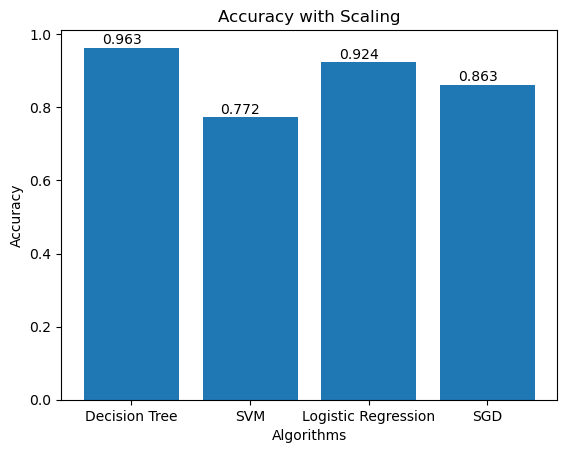

In [15]:
#Initial
x_axis = ['Decision Tree', 'SVM', 'Logistic Regression', 'SGD']
y_axis = [DT_accuracy, SVM_accuracy, LG_accuracy, SGD_accuracy]

plt.bar(x_axis, y_axis)
plt.title('Accuracy with Scaling')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
for i, v in enumerate(y_axis):
    plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
plt.show()

# Alogorithm Graphing And K Fold

In [12]:
def kFoldAverages(num,scalar):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    RF_accuracy =[]
    ET_accuracy =[]
    BG_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe = make_pipeline(scalar(), SGDClassifier())
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(), SVC(kernel='linear'))
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(),LogisticRegression(C=100, max_iter=1000))
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(),DecisionTreeClassifier())
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(),ExtraTreesClassifier())
        pipe.fit(X_train, y_train)
        ET_accuracy.append(pipe.score(X_test, y_test)) 
        
        bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=1000, bootstrap=True, n_jobs=-1, max_features = 0.1
        )
        bag_clf.fit(X_train, y_train)
        BG_accuracy.append(bag_clf.score(X_test, y_test))

    x_axis = ['Decision Tree','Random Forest','Extra Trees','Bagging Classifier' , 'SVM', 'Logistic Regression', 'SGD']
    y_axis = [DT_accuracy,RF_accuracy,ET_accuracy , BG_accuracy ,SVM_accuracy, LG_accuracy, SGD_accuracy]
    y_axis=[sum(y) / len(y) for y in y_axis]
    plt.bar(x_axis, y_axis)
    plt.title('Alogorithm Results')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


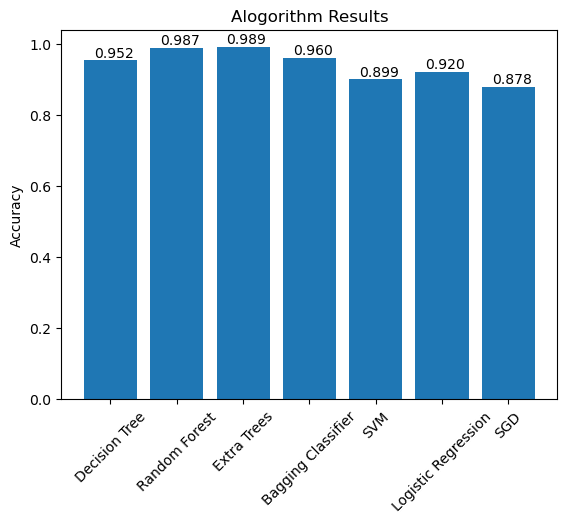

In [18]:
kFoldAverages(5,StandardScaler)

# Testing Scalars

In [22]:
def kFoldStanderdisationAverages(num):
    control_Accurarcy =[]
    standard_Accuracy =[]
    minMax_Accuracy = []
    maxAbs_Accuracy = []
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        
        
        pipe = ExtraTreesClassifier()
        pipe.fit(X_train, y_train)
        control_Accurarcy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),ExtraTreesClassifier())
        pipe.fit(X_train, y_train)
        standard_Accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(MinMaxScaler(),ExtraTreesClassifier())
        pipe.fit(X_train, y_train)
        minMax_Accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(MaxAbsScaler(),ExtraTreesClassifier())
        pipe.fit(X_train, y_train)
        maxAbs_Accuracy.append(pipe.score(X_test, y_test)) 
        
        
        
        
        

    x_axis = ['No Preprocessing','Sklearn StandardScaler','Sklearn MinMax Scaler' ,'Sklearn MaxAbs Scaler']
    y_axis = [control_Accurarcy,standard_Accuracy , minMax_Accuracy , maxAbs_Accuracy]
    y_axis=[sum(y) / len(y) for y in y_axis]
    plt.bar(x_axis, y_axis)
    plt.title('Alogorithm Results')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


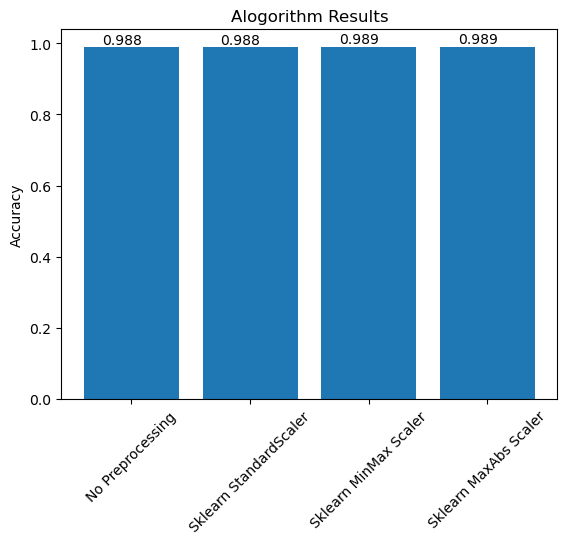

In [30]:
kFoldStanderdisationAverages(5)

In [14]:
def kFoldAverages2(num):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    ET_accuracy =[]
    RF_accuracy =[]
    BG_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe =  SGDClassifier()
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe =  SVC(kernel='linear')
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = LogisticRegression(C=100, max_iter=1000)
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = DecisionTreeClassifier()
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = RandomForestClassifier()
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(ExtraTreesClassifier())
        pipe.fit(X_train, y_train)
        ET_accuracy.append(pipe.score(X_test, y_test)) 
        
        bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=1000, bootstrap=True, n_jobs=-1, max_features = 0.1
        )
        bag_clf.fit(X_train, y_train)
        BG_accuracy.append(bag_clf.score(X_test, y_test))
    
    print("SGD Test set accuracy", SGD_accuracy) 
    print("SVM Test set accuracy", SVM_accuracy) 
    print("LG Test set accuracy", LG_accuracy) 
    print("DT Test set accuracy", DT_accuracy) 
    print("BG Test set accuracy", BG_accuracy) 
    x_axis = ['Decision Tree','Random Forest','Extra Trees','Bagging Classifier' , 'SVM', 'Logistic Regression', 'SGD']
    y_axis = [DT_accuracy,RF_accuracy, ET_accuracy , BG_accuracy ,SVM_accuracy, LG_accuracy, SGD_accuracy]
    y_axis=[sum(y) / len(y) for y in y_axis]
    plt.bar(x_axis, y_axis)
    plt.title('Alogorithm Results Without Preprocessing')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
SGD Test set accuracy [0.4791666666666667, 0.7183333333333334, 0.5933333333333334, 0.7633333333333333, 0.5258333333333334]
SVM Test set accuracy [0.8658333333333333, 0.8541666666666666, 0.8766666666666667, 0.8691666666666666, 0.8625]
LG Test set accuracy [0.8716666666666667, 0.8583333333333333, 0.8708333333333333, 0.8625, 0.8708333333333333]
DT Test set accuracy [0.965, 0.9516666666666667, 0.9558333333333333, 0.9541666666666667, 0.9608333333333333]
BG Test set accuracy [0.9633333333333334, 0.9583333333333334, 0.95, 0.9566666666666667, 0.9625]


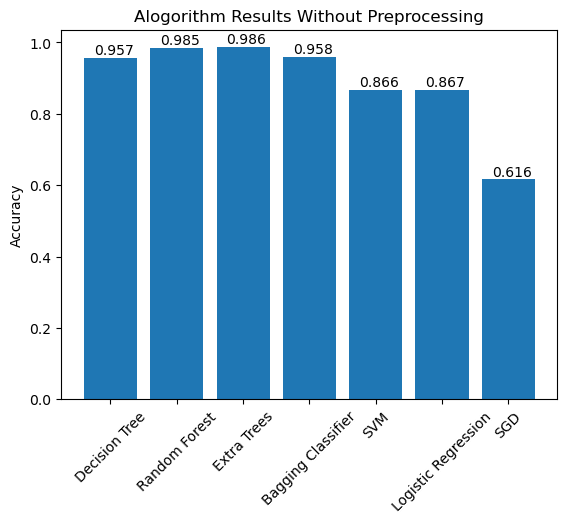

In [19]:
kFoldAverages2(5)

In [37]:
def kFoldTrees(num):
    
    ET_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        
        pipe = make_pipeline(StandardScaler(),ExtraTreesClassifier())
        pipe.fit(X_train, y_train)
        ET_accuracy.append(pipe.score(X_test, y_test)) 
        
    
    
    x_axis = ["Fold "+ str(i+1) for i in range(len(ET_accuracy))]
    y_axis = ET_accuracy
    plt.bar(x_axis, y_axis)
    plt.title('Extra Trees Results with K-fold')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


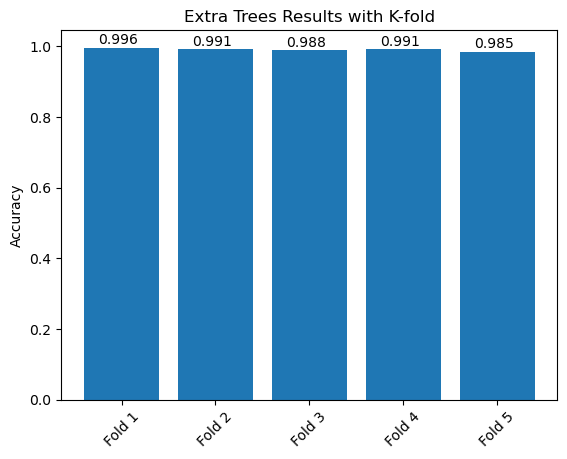

In [38]:
kFoldTrees(5)

# Tuning

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42)
param_grid = {
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10], 
    'criterion' : ['gini','entropy'],
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None]  
}


print("Starting Search")
grid_search = GridSearchCV(ExtraTreesClassifier() , param_grid, cv=5)
grid_search.fit(X_train, y_train)


print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_


best_model.score(X_test,y_test)

Starting Search
Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score:  0.9875


0.9891666666666666

In [35]:
#Gets Results for Table
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=None)

ETC = ExtraTreesClassifier( criterion= 'entropy' ,max_depth= None, max_features = None, min_samples_leaf = 2, min_samples_split= 2)
ETC.fit(X_train,y_train)
accuracy = ETC.score(X_test, y_test)
print("Accuracy:", accuracy)


y_preds = ETC.predict(X_test)


precision = precision_score(y_test, y_preds)
print("Precision:", precision)


recall = recall_score(y_test, y_preds)
print("Recall:", recall)


f1 = f1_score(y_test, y_preds)
print("F1:", f1)

Accuracy: 0.9883333333333333
Precision: 0.985
Recall: 0.9916107382550335
F1: 0.9882943143812708


In [79]:
0.9879166666666667

0.9879166666666667

# Predictions and Confidence

In [81]:
ETC = ExtraTreesClassifier( criterion= 'entropy' ,max_depth= None, max_features = None, min_samples_leaf = 2, min_samples_split= 2)

In [6]:
X_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]


In [7]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,116.889120,131860.3269,-3.076783,131810.1804,-123.094253,131910.4735,114.780635,376.10794,-5.254023,374.82617,...,0,0,0,0,0,0,0,0,0,0
5996,116.849013,131810.1804,-3.116890,131760.0339,-123.128630,131885.4002,114.769176,376.29105,-5.322778,374.82617,...,0,0,0,0,0,0,0,0,0,0
5997,116.384917,131734.9606,-3.586716,131684.8140,-123.586996,131785.1071,114.299351,376.47416,-5.849899,374.82617,...,0,0,0,0,0,0,0,0,0,0
5998,111.125164,130506.3704,-8.846468,130456.2238,-128.858208,130556.5169,106.667553,478.83265,-13.464508,477.73399,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: 128, Length: 6000, dtype: int64

In [9]:
X_test=pd.DataFrame(data = testData)

In [22]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
ETC = ExtraTreesClassifier( criterion= 'entropy' ,max_depth= None, max_features = None, min_samples_leaf = 2, min_samples_split= 2)
ETC.fit(X_train, y_train)
print(ETC.score(X_train,y_train))

1.0


In [23]:
preds = ETC.predict(X_test)

In [24]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
pd.DataFrame(preds).to_csv('TestingResultsBinary.csv', index=False, header=False)

In [26]:
pps = ETC.predict_proba(X_test)

In [27]:
con = []
for y in pps:
    if y[0] > 0.5:
        con.append(y[0])
    else:
        con.append(y[1])
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9666666666666666, 0.9466666666666665, 0.92, 0.91, 0.92, 0.91, 0.91, 0.9033333333333334, 0.6566666666666666, 0.6283333333333334, 0.595, 1.0, 0.9566666666666666, 0.975, 1.0, 0.98, 0.9533333333333335, 0.9633333333333334, 0.7966666666666667, 0.7850000000000001, 0.945, 0.935, 0.92, 0.895, 0.8583333333333334, 0.8483333333333334, 0.5716666666666668, 0.6933333333333335, 0.8366666666666666, 0.85, 0.91, 0.8966666666666666, 0.815, 0.8699999999999999, 0.8133333333333332, 0.6466666666666667, 0.6816666666666668, 0.995, 0.845, 0.9816666666666666, 1.0, 1.0, 0.995, 0.97, 0.975, 0.975, 0.9016666666666667, 0.8516666666666666, 0.9366666666666665, 0.9016666666666666, 0.8616666666666666, 0.8816666666666666, 0.875, 0.8333333333333333, 0.85, 0.93, 0.94, 0.935, 0.94, 0.945, 0.98, 0.98, 0.6033333333333334, 0.7266666666666666, 0.7066666666666666, 0.6733333333333335, 0.93, 0.7833333333333333, 0.84, 0.905, 0.86, 0.83, 0.93, 0.87333333333333

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=None)
pipe = make_pipeline(StandardScaler(),ETC)
pipe.fit(X_train, y_train)



DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy)) 
pps =pipe.predict_proba(X_test)

con = []
for y in pps:
    if y[0] > 0.5:
        con.append(y[0])
    else:
        con.append(y[1])
        
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)


Test set accuracy: 0.99
[1.0, 0.99, 1.0, 0.9816666666666666, 1.0, 0.9966666666666667, 1.0, 0.995, 1.0, 0.9933333333333333, 1.0, 0.9316666666666668, 0.9733333333333333, 0.8966666666666666, 0.9816666666666666, 0.6516666666666667, 0.975, 1.0, 1.0, 0.5000000000000001, 0.92, 0.99, 0.985, 0.985, 0.975, 1.0, 1.0, 0.96, 0.995, 1.0, 0.7133333333333333, 1.0, 0.99, 0.99, 0.5833333333333334, 1.0, 0.985, 0.9966666666666666, 0.97, 0.5233333333333333, 0.9966666666666667, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.9016666666666666, 0.9925, 1.0, 0.9933333333333334, 0.9933333333333333, 0.9383333333333332, 0.9516666666666667, 0.94, 1.0, 0.86, 0.965, 0.9666666666666666, 0.5941666666666666, 0.995, 0.995, 1.0, 1.0, 0.965, 0.9166666666666667, 0.995, 0.99, 0.995, 1.0, 0.95, 1.0, 0.94, 0.8766666666666667, 0.9283333333333335, 1.0, 0.995, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 0.995, 1.0, 1.0, 0.995, 0.9833333333333334, 0.9616666666666666, 1.0, 1.0, 0.99, 0.995, 1.0, 0.995, 1.0, 0.9233333333333333, 0.96, 

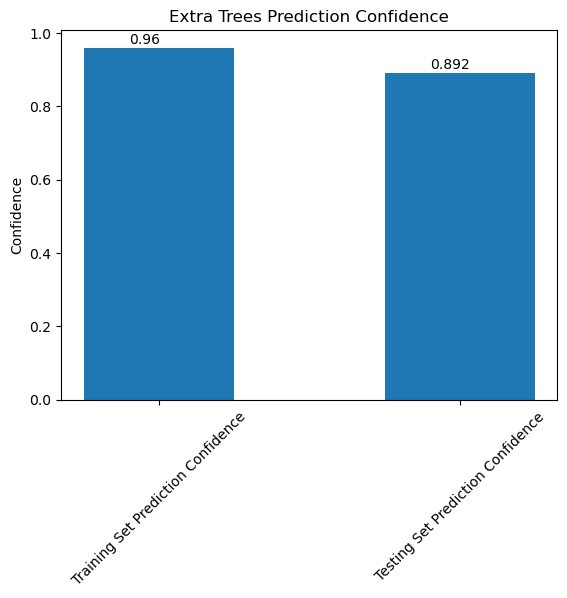

In [29]:
x_axis = ["Training Set Prediction Confidence", "Testing Set Prediction Confidence"]
y_axis = [0.960,0.892]
plt.bar(x_axis, y_axis, width = 0.5)
plt.title('Extra Trees Prediction Confidence')
plt.ylabel('Confidence')
for i, v in enumerate(y_axis):
    plt.text(i-0.1, v+0.01, "{:.3}".format(v))
plt.xticks(rotation=45)
plt.show()

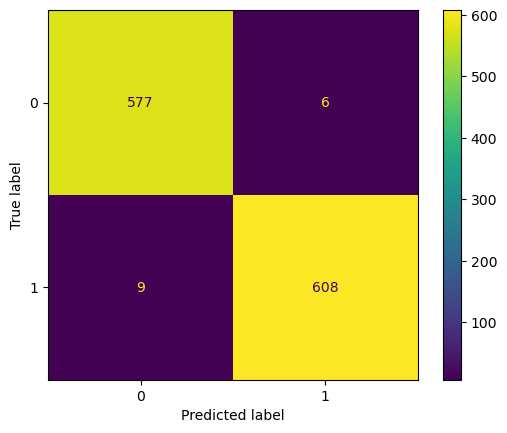

In [94]:

X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=None)
pipe = make_pipeline(StandardScaler(),ETC)
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()
